In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 15:56:55.436759: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 15:56:55.504695: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 15:56:55.505559: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 15:56:56.459960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       20        
                                                                 
 average_pooling2d (Average  (None, 64, 64, 2)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 4)         76        
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 4)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 8)         0

In [6]:
trainer.training_loop()

2023/08/13 15:56:59 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 15:56:59 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/40
56/56 - 8s - loss: 0.6283 - recall: 0.8619 - binary_accuracy: 0.6401 - precision: 0.6516 - false_negatives: 74.0000 - false_positives: 247.0000 - val_loss: 0.6223 - val_recall: 0.6493 - val_binary_accuracy: 0.6757 - val_precision: 0.7768 - val_false_negatives: 47.0000 - val_false_positives: 25.0000 - 8s/epoch - 141ms/step
Epoch 2/40


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 - 4s - loss: 0.5823 - recall: 0.7892 - binary_accuracy: 0.7040 - precision: 0.7369 - false_negatives: 113.0000 - false_positives: 151.0000 - val_loss: 0.5720 - val_recall: 0.7910 - val_binary_accuracy: 0.7027 - val_precision: 0.7361 - val_false_negatives: 28.0000 - val_false_positives: 38.0000 - 4s/epoch - 72ms/step
Epoch 3/40
56/56 - 4s - loss: 0.5255 - recall: 0.8134 - binary_accuracy: 0.7377 - precision: 0.7649 - false_negatives: 100.0000 - false_positives: 134.0000 - val_loss: 0.5490 - val_recall: 0.7761 - val_binary_accuracy: 0.7162 - val_precision: 0.7591 - val_false_negatives: 30.0000 - val_false_positives: 33.0000 - 4s/epoch - 79ms/step
Epoch 4/40
56/56 - 4s - loss: 0.5186 - recall: 0.7854 - binary_accuracy: 0.7377 - precision: 0.7796 - false_negatives: 115.0000 - false_positives: 119.0000 - val_loss: 0.5554 - val_recall: 0.6567 - val_binary_accuracy: 0.7072 - val_precision: 0.8224 - val_false_negatives: 46.0000 - val_false_positives: 19.0000 - 4s/epoch - 79ms/step
Epoch 

2023/08/13 15:59:52 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 15:59:52 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmp2chabzry/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp2chabzry/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.


Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 3s 39ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9720149253731343, 'fp_Train_acc': 0.9820627802690582, 'fp_Train_precision': 0.9980842911877394}
Confusion matrix Train 
 [[355   1]
 [ 15 521]]
56/56 [==============================] - 2s 40ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (342).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (322).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (363).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (381).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (385).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (456).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (457).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (516).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (56).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (588).jp

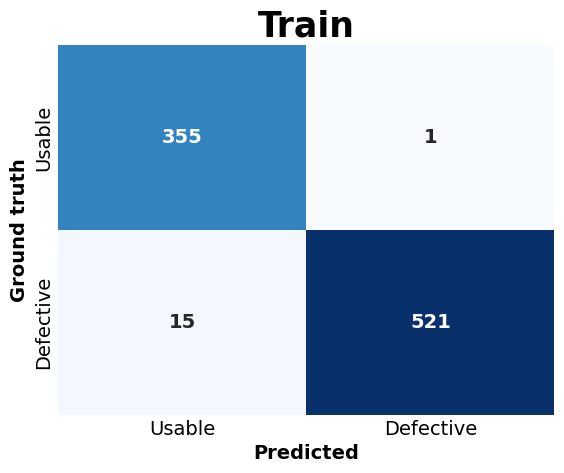

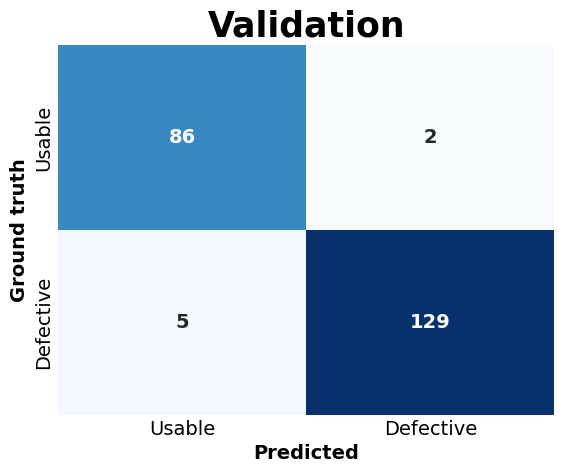

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmpc6sj3kb8/assets


INFO:tensorflow:Assets written to: /tmp/tmpc6sj3kb8/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 16:00:09.884963: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 16:00:09.884993: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 16:00:09.885330: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpc6sj3kb8
2023-08-13 16:00:09.887487: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 16:00:09.887512: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpc6sj3kb8
2023-08-13 16:00:09.892894: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00\xb0#\x00\x00\xc0#\x00\x00\xc4;\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\x8e\xdb\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xd6\xdc\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\xcc"\x00\x00\xc4"\x00\x00\xac"\x00\x00\x90"\x00\x00\x80\x1a\x00\x00\xf0\x19\x00\x00\xe0\x07\x00\x00\x90\x07\x00\x00\x00\x03\x00\x00\xd0\x02\x00\x00\xa0\

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 2s 32ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.012315369, 'qt_std': 0.024532573, 'qt_abs_mean': 0.013499351, 'qt_abs_std': 0.023901528}


{'diff': array([-1.04238428e-02, -8.72606412e-03, -2.66442122e-03, -2.21996731e-03,
         9.11553949e-03, -9.63312486e-05, -2.50443770e-03,  1.80636346e-02,
        -5.87315112e-03, -1.62901741e-03,  2.04478134e-03, -1.21878125e-02,
        -1.31271370e-02, -7.79483095e-03, -2.42753886e-03,  1.85497850e-03,
        -5.74459229e-03, -2.63176300e-03, -2.32854113e-03,  5.68202138e-03,
        -3.85697582e-04, -6.86578453e-04, -1.31378882e-03, -3.11430991e-02,
         6.06188178e-03, -2.29025027e-03, -2.00525299e-03, -2.66192202e-03,
        -4.10563052e-02, -7.24338181e-03, -1.62278973e-02, -6.87836111e-03,
        -1.06003783e-04, -4.52025607e-03,  1.19185308e-03, -2.72765309e-02,
        -1.37352832e-02, -4.08261567e-02, -8.06596130e-04, -3.70327471e-04,
         1.57249789e-03, -6.87953085e-04, -3.75086628e-03, -7.14336697e-04,
        -2.02778960e-03,  1.13294972e-03, -8.84111971e-04, -1.26294326e-03,
        -1.39535824e-03, -6.97909854e-03,  1.67526654e-03, -2.21845657e-02,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.957089552238806, 'qt_Train_acc': 0.9742152466367713, 'qt_Train_precision': 1.0}
Confusion matrix Train 
 [[356   0]
 [ 23 513]]
Errors list Train 
 ['../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (304).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (322).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (330).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (343).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (363).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (381).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (385).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (436).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (456).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (457).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (460).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (468)

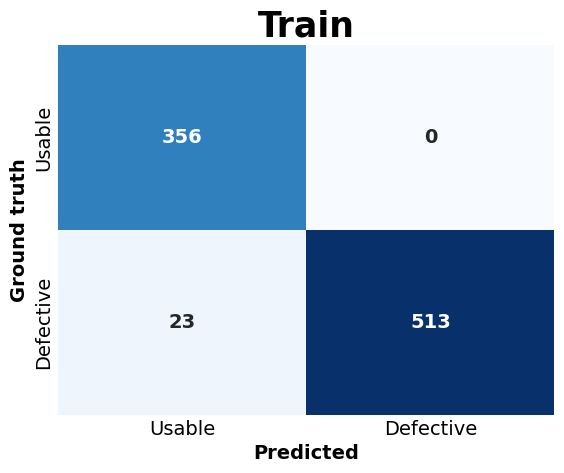

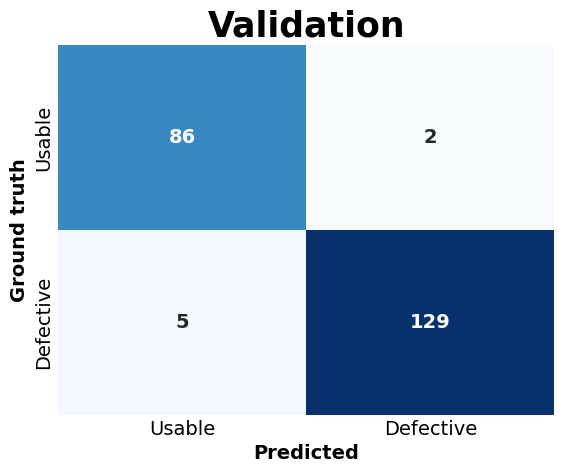

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 0s 25ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9363636363636364, 'fp_Test_acc': 0.9617486338797814, 'fp_Test_precision': 1.0}
Confusion matrix Test 
 [[ 73   0]
 [  7 103]]
12/12 [==============================] - 0s 27ms/step
Errors list Test 
 ['../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (677).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (706).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (767).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg']


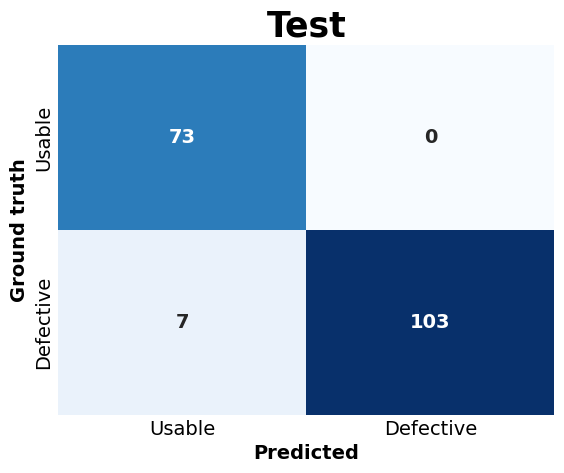

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9272727272727272, 'qt_Test_acc': 0.9562841530054644, 'qt_Test_precision': 1.0}
Confusion matrix Test 
 [[ 73   0]
 [  8 102]]
Errors list Test 
 ['../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (677).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (706).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (751).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (767).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg']


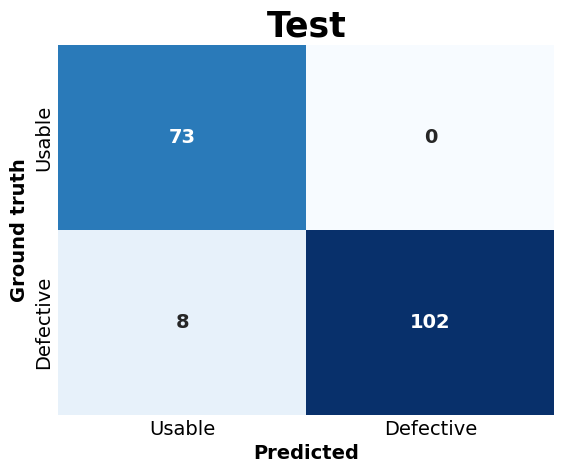

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()